# Exploratory Project - 01. Classifications

### 2022-11-06 (일)

### 곽상혁 
### https://github.com/docosa2/

In [72]:
import warnings
warnings.filterwarnings('ignore')

def printDoubleLine(title: str) -> None:
    print('========================================================')
    print('[', title, ']')

def printLine(title: str = None) -> None:
    print('--------------------------------------------------------')
    if title is not None:
        print('[', title, ']')
    return

# E-01 1. load_digits

### 라이브러리 불러오기

In [38]:
# 라이브러리 불러오기
import sklearn 
print('sklean version :',sklearn.__version__)

sklean version : 1.1.2


In [39]:
# 변수 설정
RANDOM_STATE = 42
TEST_SIZE = 0.2

### (1) 필요한 모듈 임포트

In [40]:
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

### (2) 데이타 준비

In [41]:
# (2) 데이타 준비 : load_digits
digits = load_digits()
print('dataset : sklearn.datasets.load_digits')
print('https:////scikit-learn.org//stable//modules//generated//sklearn.datasets.load_digits.html#sklearn.datasets.load_digits')

dataset : sklearn.datasets.load_digits
https:////scikit-learn.org//stable//modules//generated//sklearn.datasets.load_digits.html#sklearn.datasets.load_digits


### (3) 데이타 이해하기

In [42]:
# (3) 데이터 이해하기
print('keys :', digits.keys())
digits_feature_names = digits.feature_names
digits_label = digits.target
digits_data = digits.data
print('target_names :', digits.target_names)
print(digits.DESCR)

keys : dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
target_names : [0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and differ

In [43]:
df_digits = pd.DataFrame(digits_data, columns=digits_feature_names)

In [44]:
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [45]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [46]:
df_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


<AxesSubplot:>

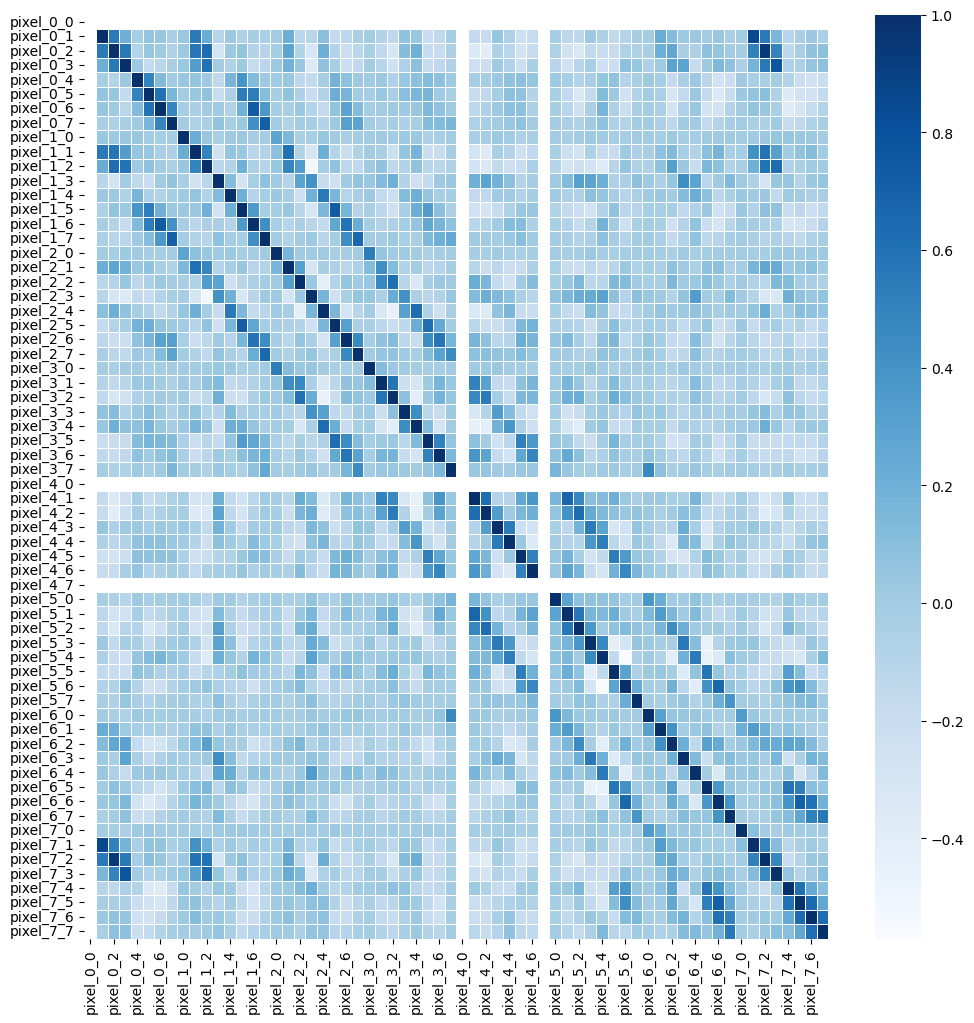

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(data = df_digits.corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(1, 0, 'pixel_0_0'),
  Text(2, 0, 'pixel_0_1'),
  Text(3, 0, 'pixel_0_2'),
  Text(4, 0, 'pixel_0_3'),
  Text(5, 0, 'pixel_0_4'),
  Text(6, 0, 'pixel_0_5'),
  Text(7, 0, 'pixel_0_6'),
  Text(8, 0, 'pixel_0_7'),
  Text(9, 0, 'pixel_1_0'),
  Text(10, 0, 'pixel_1_1'),
  Text(11, 0, 'pixel_1_2'),
  Text(12, 0, 'pixel_1_3'),
  Text(13, 0, 'pixel_1_4'),
  Text(14, 0, 'pixel_1_5'),
  Text(15, 0, 'pixel_1_6'),
  Text(16, 0, 'pixel_1_7'),
  Text(17, 0, 'pixel_2_0'),
  Text(18, 0, 'pixel_2_1'),
  Text(19, 0, 'pixel_2_2'),
  Text(20, 0, 'pixel_2_3'),
  Text(21, 0, 'pixel_2_4'),
  Text(22, 0, 'pixel_2_5'),
  Text(23, 0, 'pixel_2_6'),
  Text(24, 0, 'pixel_2_7'),
  Text(25, 0, 'pixel_3_0'),
  Text(26, 0, 'pixe

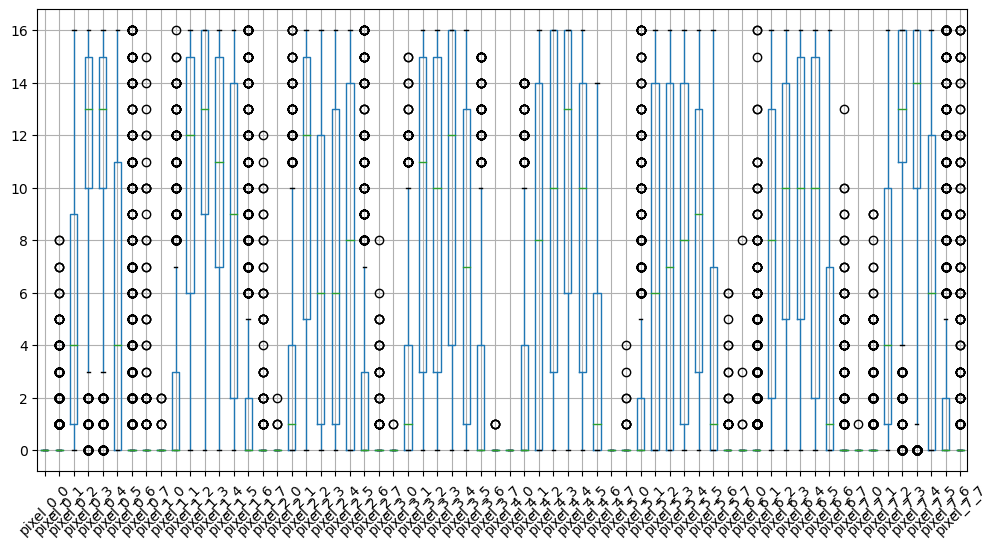

In [48]:
plt.figure(figsize=(12, 6))
boxplot = df_digits.boxplot(column=digits_feature_names)
plt.xticks(rotation=45)

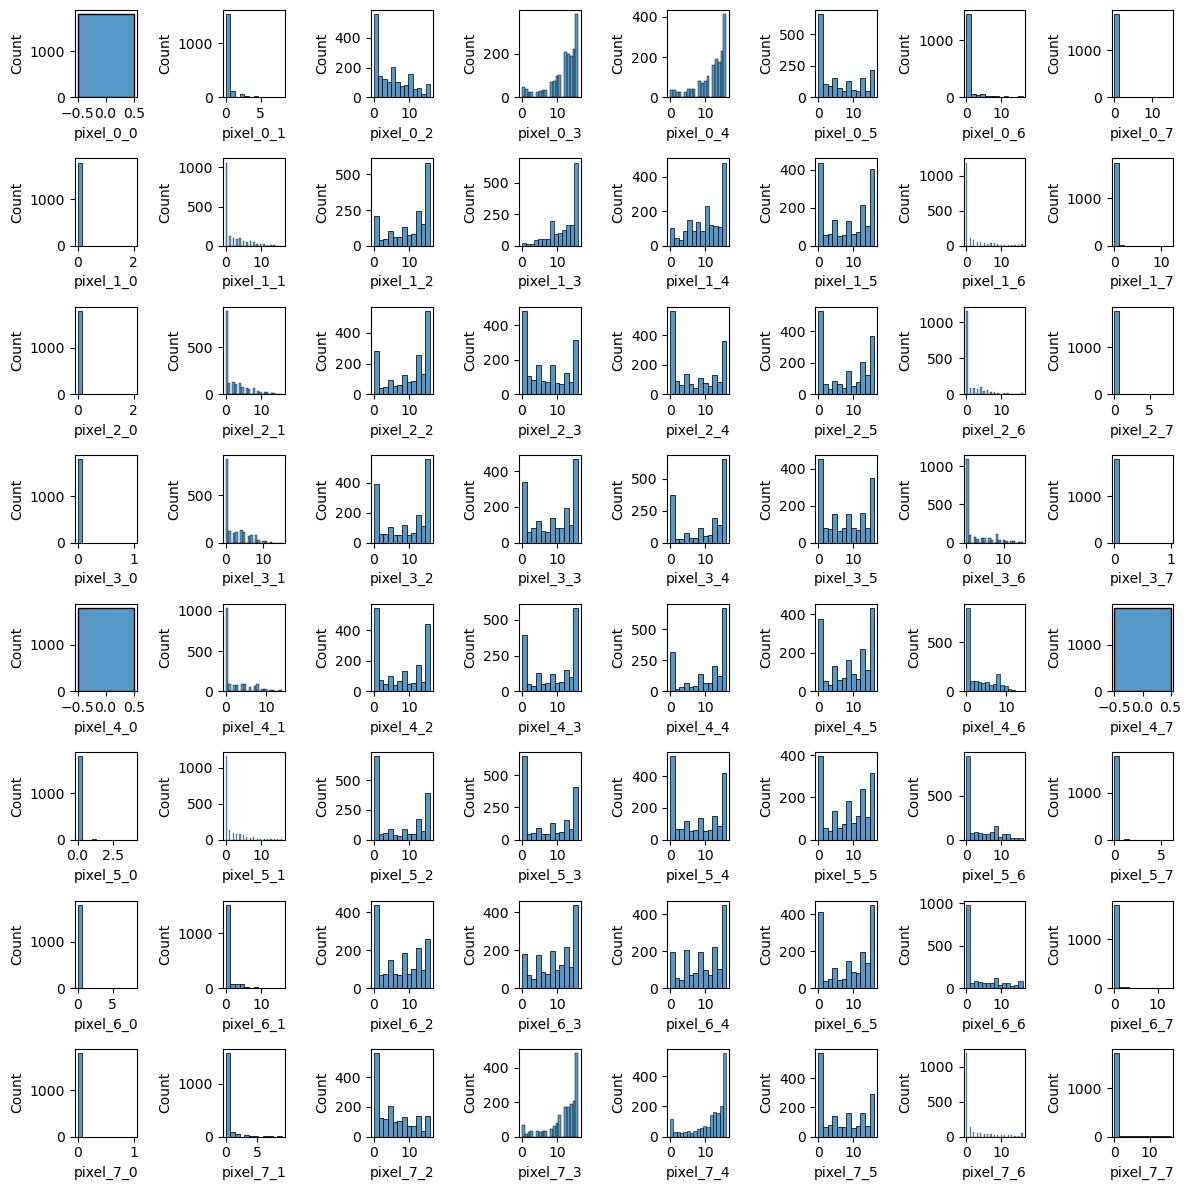

In [49]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_digits.columns) :
    ax = fig.add_subplot(8,8,i+1)
    sns.histplot(data=df_digits, x=col)
plt.tight_layout()
plt.show()   

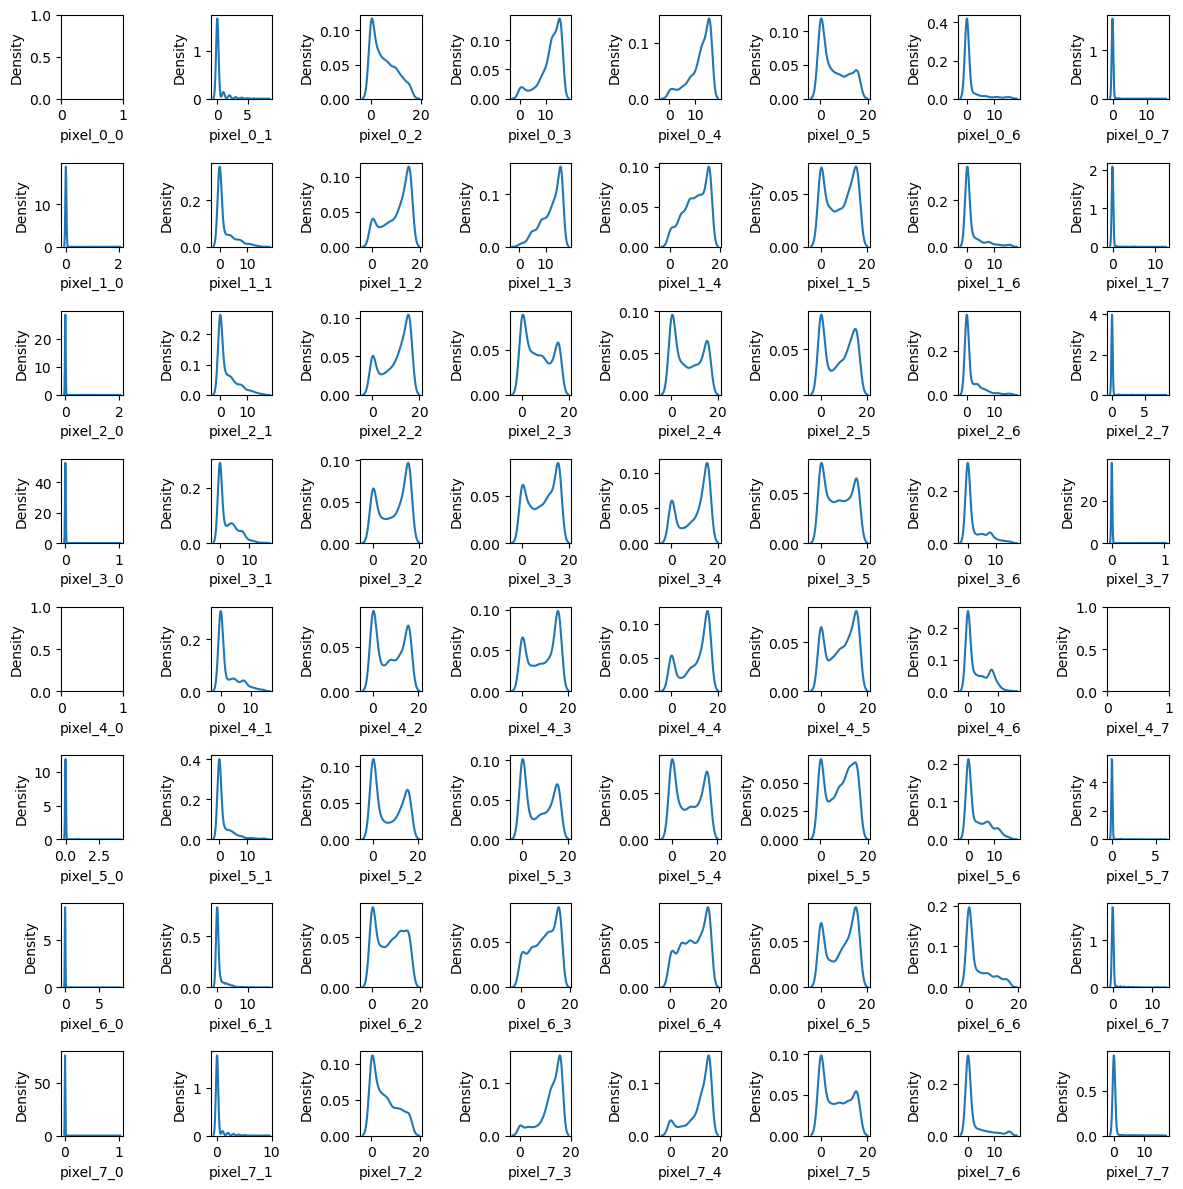

In [108]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_digits.columns) :
    ax = fig.add_subplot(8,8,i+1)
    sns.kdeplot(data=df_digits, x=col)
plt.tight_layout()
plt.show() 

In [51]:
# data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() # StandardScaler() 
scaler.fit(df_digits)
X = scaler.transform(df_digits)

y = digits_label

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(1, 0, 'pixel_0_0'),
  Text(2, 0, 'pixel_0_1'),
  Text(3, 0, 'pixel_0_2'),
  Text(4, 0, 'pixel_0_3'),
  Text(5, 0, 'pixel_0_4'),
  Text(6, 0, 'pixel_0_5'),
  Text(7, 0, 'pixel_0_6'),
  Text(8, 0, 'pixel_0_7'),
  Text(9, 0, 'pixel_1_0'),
  Text(10, 0, 'pixel_1_1'),
  Text(11, 0, 'pixel_1_2'),
  Text(12, 0, 'pixel_1_3'),
  Text(13, 0, 'pixel_1_4'),
  Text(14, 0, 'pixel_1_5'),
  Text(15, 0, 'pixel_1_6'),
  Text(16, 0, 'pixel_1_7'),
  Text(17, 0, 'pixel_2_0'),
  Text(18, 0, 'pixel_2_1'),
  Text(19, 0, 'pixel_2_2'),
  Text(20, 0, 'pixel_2_3'),
  Text(21, 0, 'pixel_2_4'),
  Text(22, 0, 'pixel_2_5'),
  Text(23, 0, 'pixel_2_6'),
  Text(24, 0, 'pixel_2_7'),
  Text(25, 0, 'pixel_3_0'),
  Text(26, 0, 'pixe

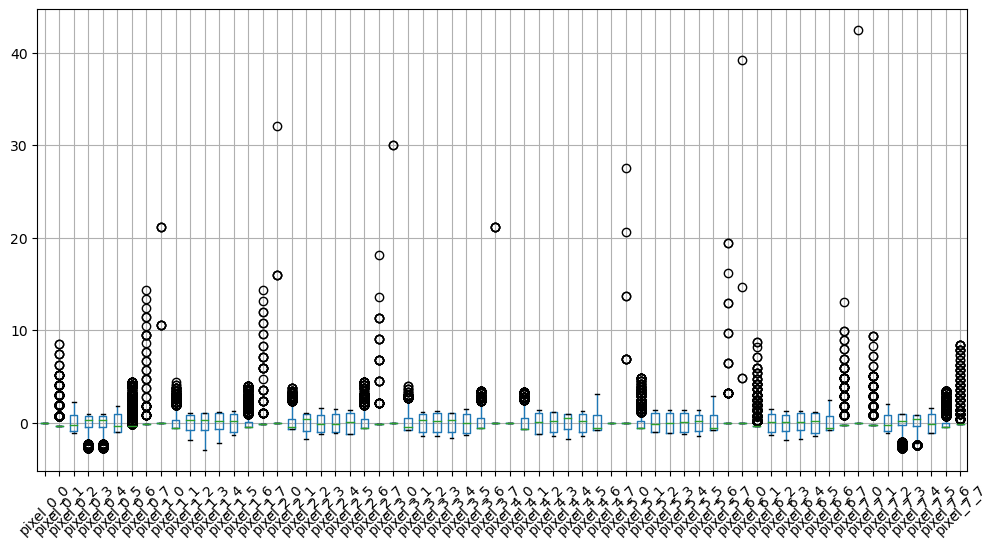

In [52]:
plt.figure(figsize=(12,6))
boxplot = pd.DataFrame(X, columns=digits_feature_names).boxplot()
plt.xticks(rotation=45)

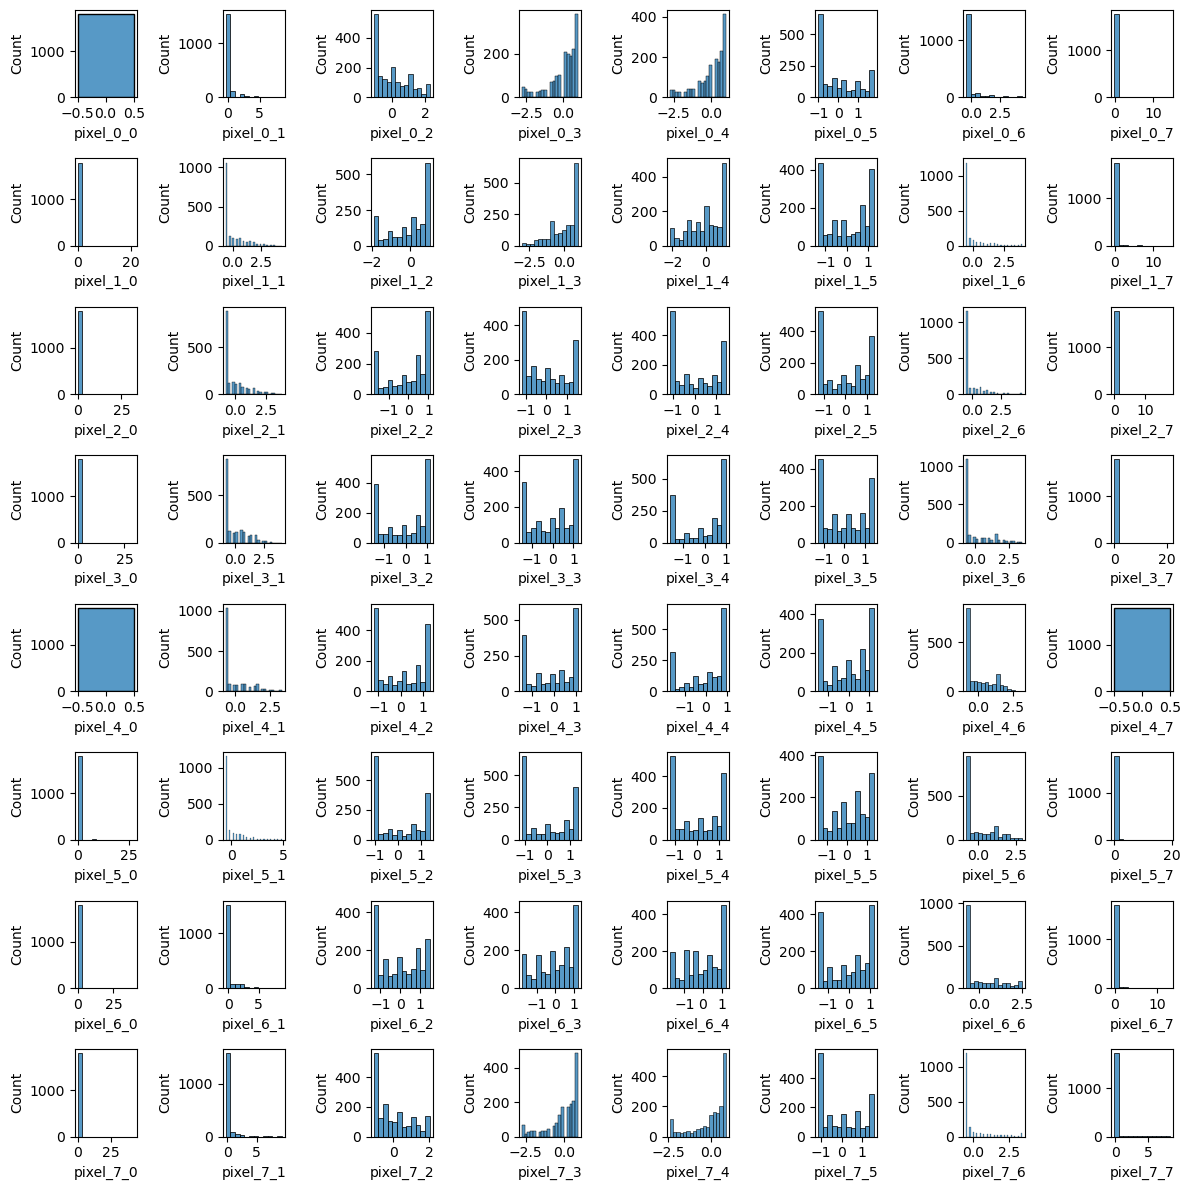

In [53]:
df_X_view = pd.DataFrame(X, columns=digits_feature_names)
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_X_view) :
    ax = fig.add_subplot(8, 8, i+1)
    sns.histplot(data=df_X_view, x=col)
plt.tight_layout()
plt.show()  

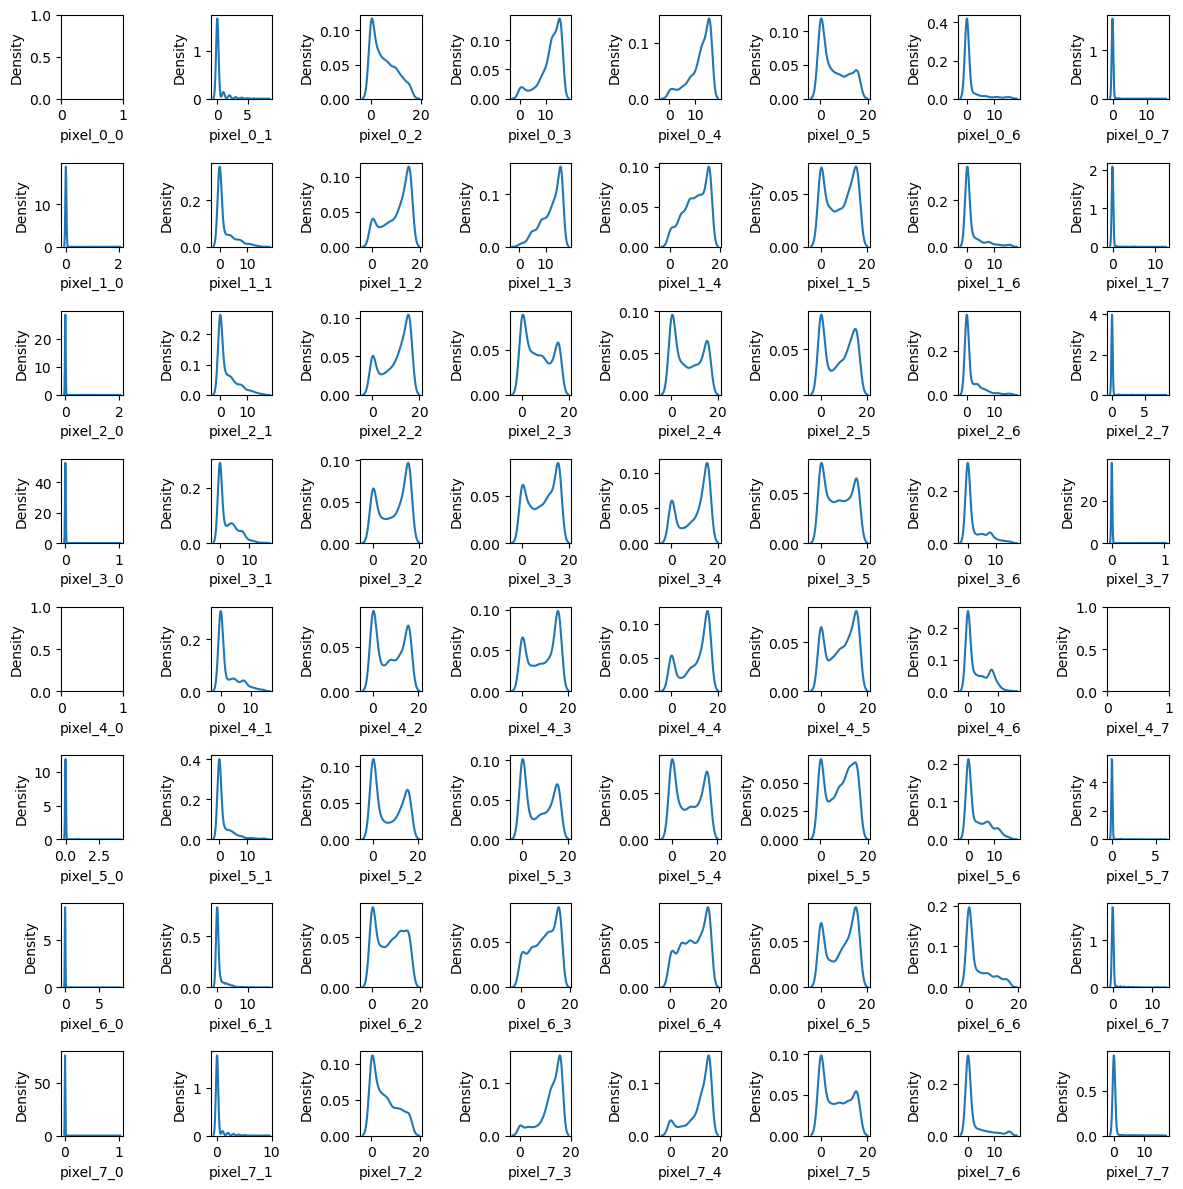

In [109]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_digits.columns) :
    ax = fig.add_subplot(8,8,i+1)
    sns.kdeplot(data=df_digits, x=col)
plt.tight_layout()
plt.show() 

### (4)  train, test 데이터 분리

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE) 

In [55]:
print('train set')
print('\t X shape', X_train.shape)
print('\t y shape', y_train.shape)
print('test set')
print('\t X shape', X_test.shape)
print('\t y shape', y_test.shape)

train set
	 X shape (1437, 64)
	 y shape (1437,)
test set
	 X shape (360, 64)
	 y shape (360,)


### (5) 다양한 모델로 학습시켜 보기

### (5-1) Decision Tree 

[ Decision Tree ]
estimator type : classifier
Accuracy : 0.8416666666666667
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.76      0.81        33
           3       0.76      0.85      0.81        34
           4       0.81      0.91      0.86        46
           5       0.91      0.85      0.88        47
           6       1.00      0.91      0.96        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.74      0.80      0.77        40

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.842)')

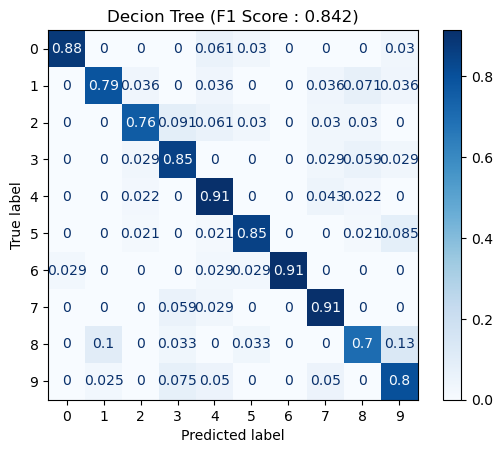

In [73]:
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=digits.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-2) Random Forest

--------------------------------------------------------
[ Random Forest ]
estimator type : classifier
Accuracy : 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Text(0.5, 1.0, 'Random Forest (F1 Score : 0.972)')

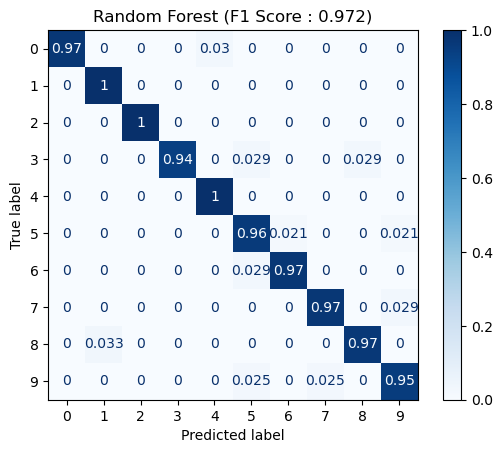

In [74]:
printLine('Random Forest')
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
print('estimator type :', random_forest._estimator_type)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(random_forest, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=digits.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Random Forest (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-3) SVM

--------------------------------------------------------
[ Support Vector Machine ]
estimator type : classifier
Accuracy : 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Text(0.5, 1.0, 'Support Vector Machine (F1 Score : 0.981)')

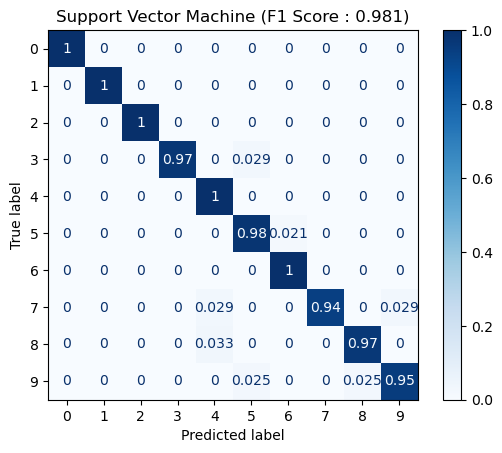

In [75]:
printLine('Support Vector Machine')
svm_model = svm.SVC()
print('estimator type :', svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(svm_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=digits.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Support Vector Machine (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-4) SGD Classifier

--------------------------------------------------------
[ Stochastic Gradient Descent Classifier ]
estimator type : classifier
Accuracy : 0.9527777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      0.96      0.93        28
           2       1.00      0.94      0.97        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       0.78      0.93      0.85        30
           9       0.92      0.88      0.90        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



Text(0.5, 1.0, 'Stochastic Gradient Descent (F1 Score :0.954)')

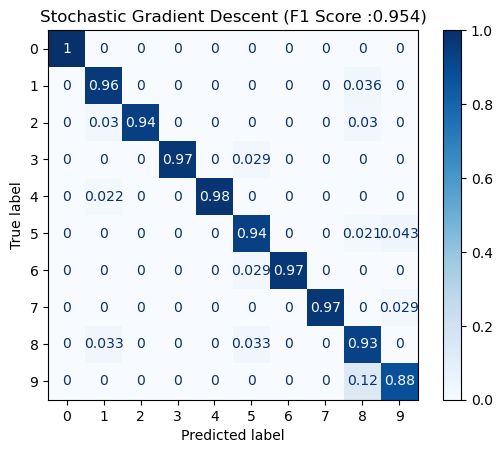

In [76]:
printLine('Stochastic Gradient Descent Classifier')
sgd_model = SGDClassifier() 
print('estimator type :', sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(sgd_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=digits.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Stochastic Gradient Descent (F1 Score :' + str(round(f1score, 3)) + ')')

### (5-5) Logistic Regression

--------------------------------------------------------
[ Logistic Regression Classifier ]
estimator type : classifier
Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        40

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

--------------------------------------------------------


Text(0.5, 1.0, 'Logistic Regression (F1 Score :1.0)')

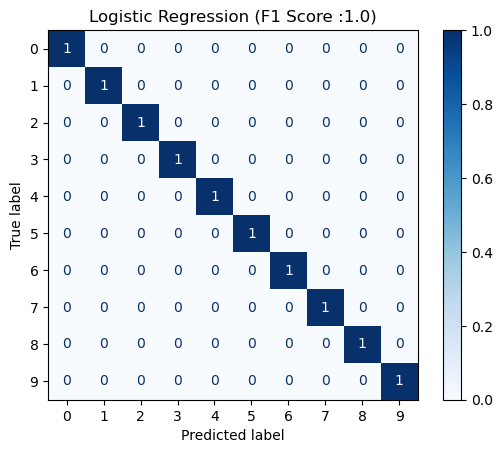

In [77]:
printLine('Logistic Regression Classifier')
logistic_model = LogisticRegression()
print('estimator type :', logistic_model._estimator_type) 
logistic_model.fit(X_test, y_test)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
printLine()
plot = plot_confusion_matrix(logistic_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=digits.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Logistic Regression (F1 Score :' + str(round(f1score, 3)) + ')')

# E-01 2. load_wine : 와인 품종 분류

### 라이브러리 불러오기

In [78]:
import sklearn 
print('sklean version :',sklearn.__version__)

sklean version : 1.1.2


### 변수 설정

In [79]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

### (1) 필요한 모듈 임포트 

In [80]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

### (2) 데이타 준비

In [81]:
wine = load_wine()
print('dataset : sklearn.datasets.load_wine')
print('https:////scikit-learn.org//stable//modules//generated//sklearn.datasets.load_wine.html#sklearn.datasets.load_wine')

dataset : sklearn.datasets.load_wine
https:////scikit-learn.org//stable//modules//generated//sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


### (3) 데이터 이해하기

In [82]:
print('keys :',wine.keys())
wine_feature_names = wine.feature_names
wine_label = wine.target
wine_data = wine.data
print('target_names :', wine.target_names)
print(wine.DESCR)

keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
target_names : ['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    

In [83]:
df_wine = pd.DataFrame(wine_data, columns=wine_feature_names)

In [84]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [85]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [86]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

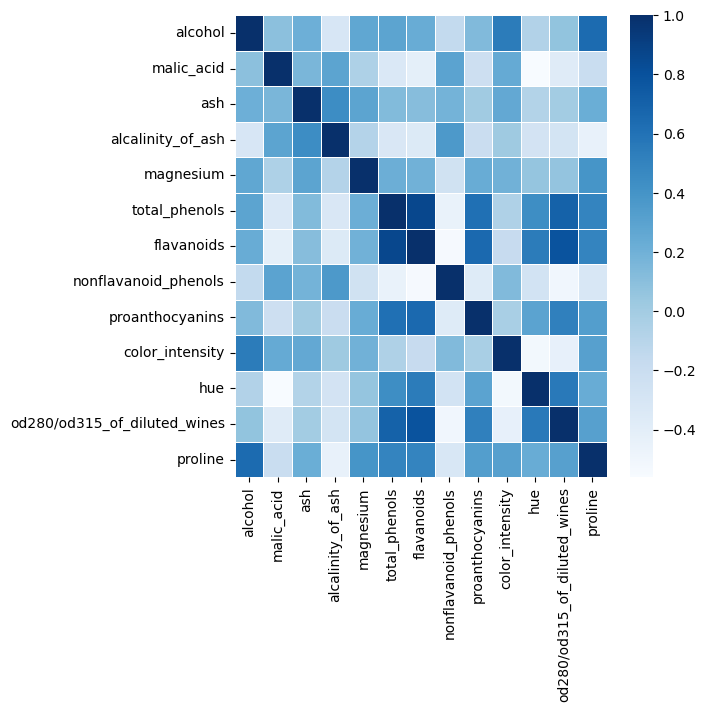

In [88]:
plt.figure(figsize=(6,6))
sns.heatmap(data = df_wine.corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

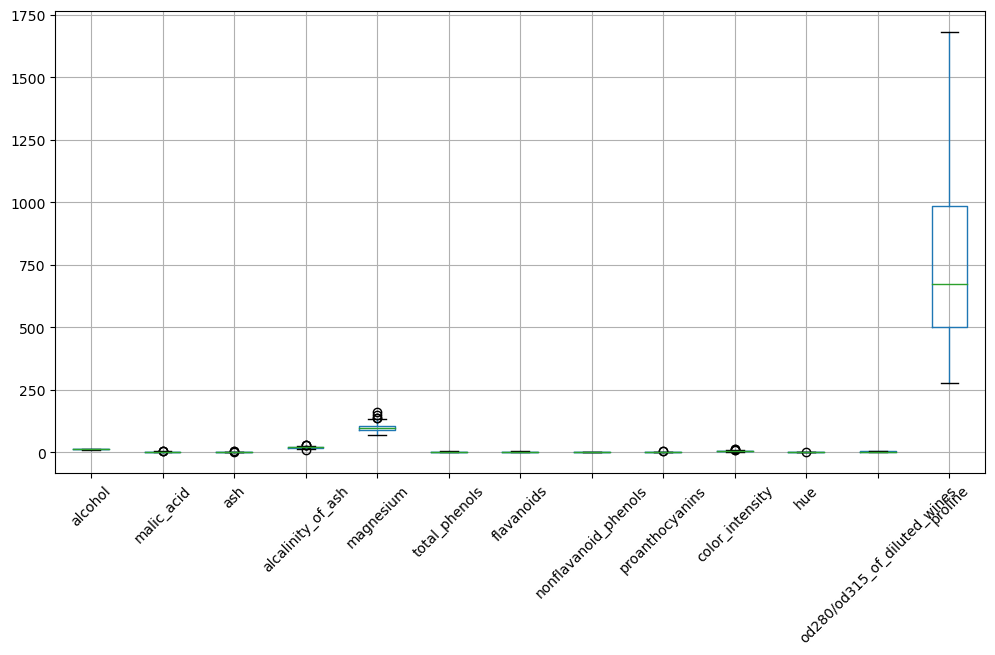

In [89]:
plt.figure(figsize=(12, 6))
boxplot = df_wine.boxplot(column=wine_feature_names)
plt.xticks(rotation=45)

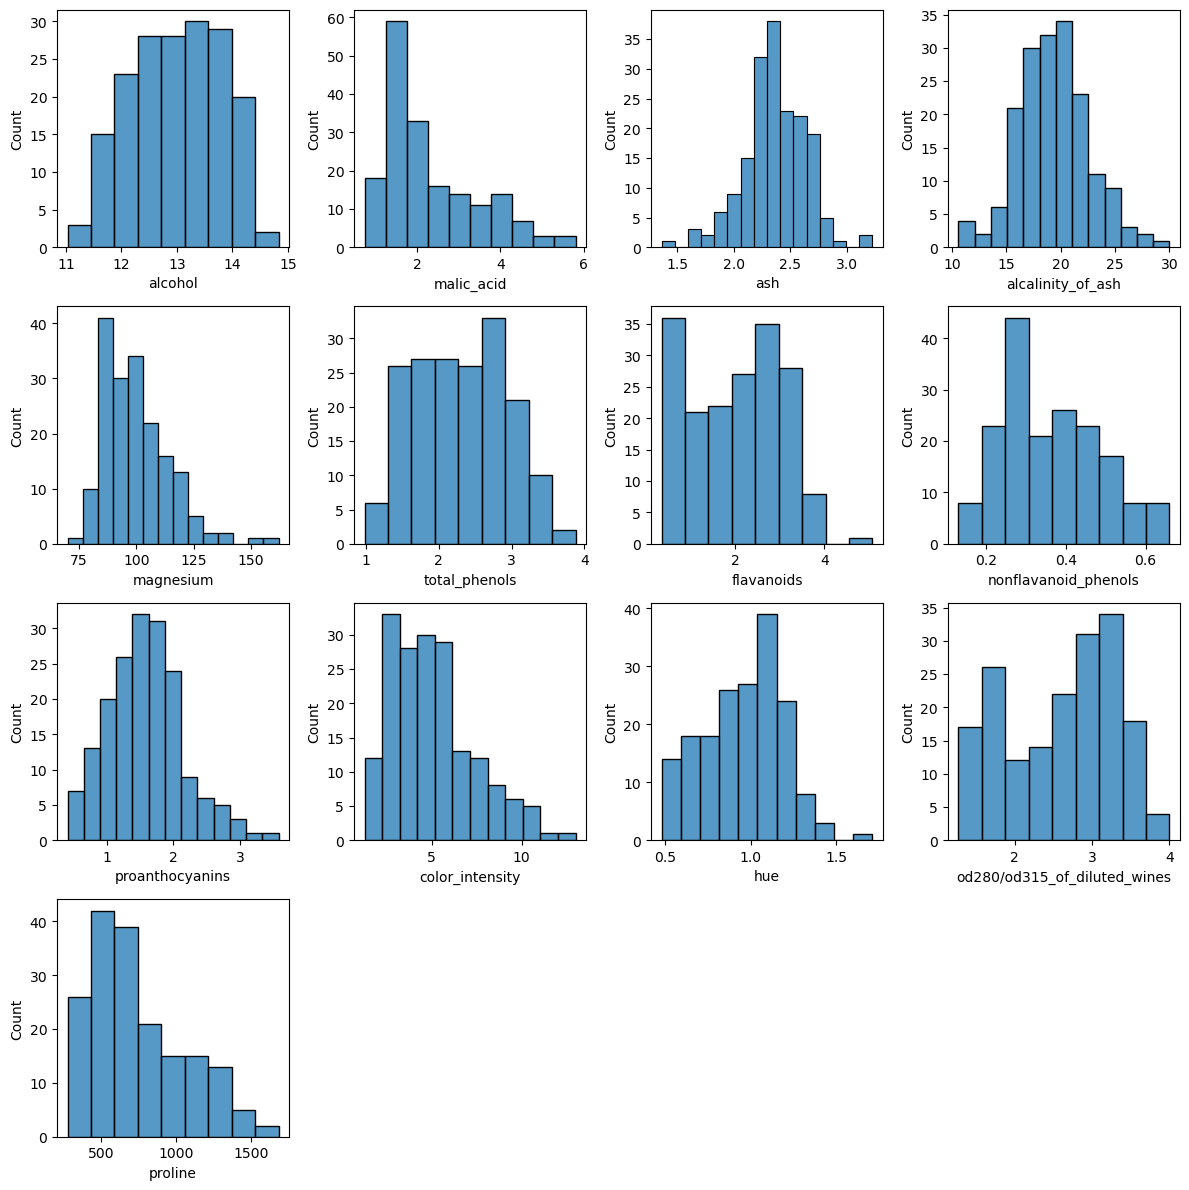

In [94]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_wine.columns) :
    ax = fig.add_subplot(4,4,i+1)
    sns.histplot(data=df_wine, x=col)
plt.tight_layout()
plt.show()   

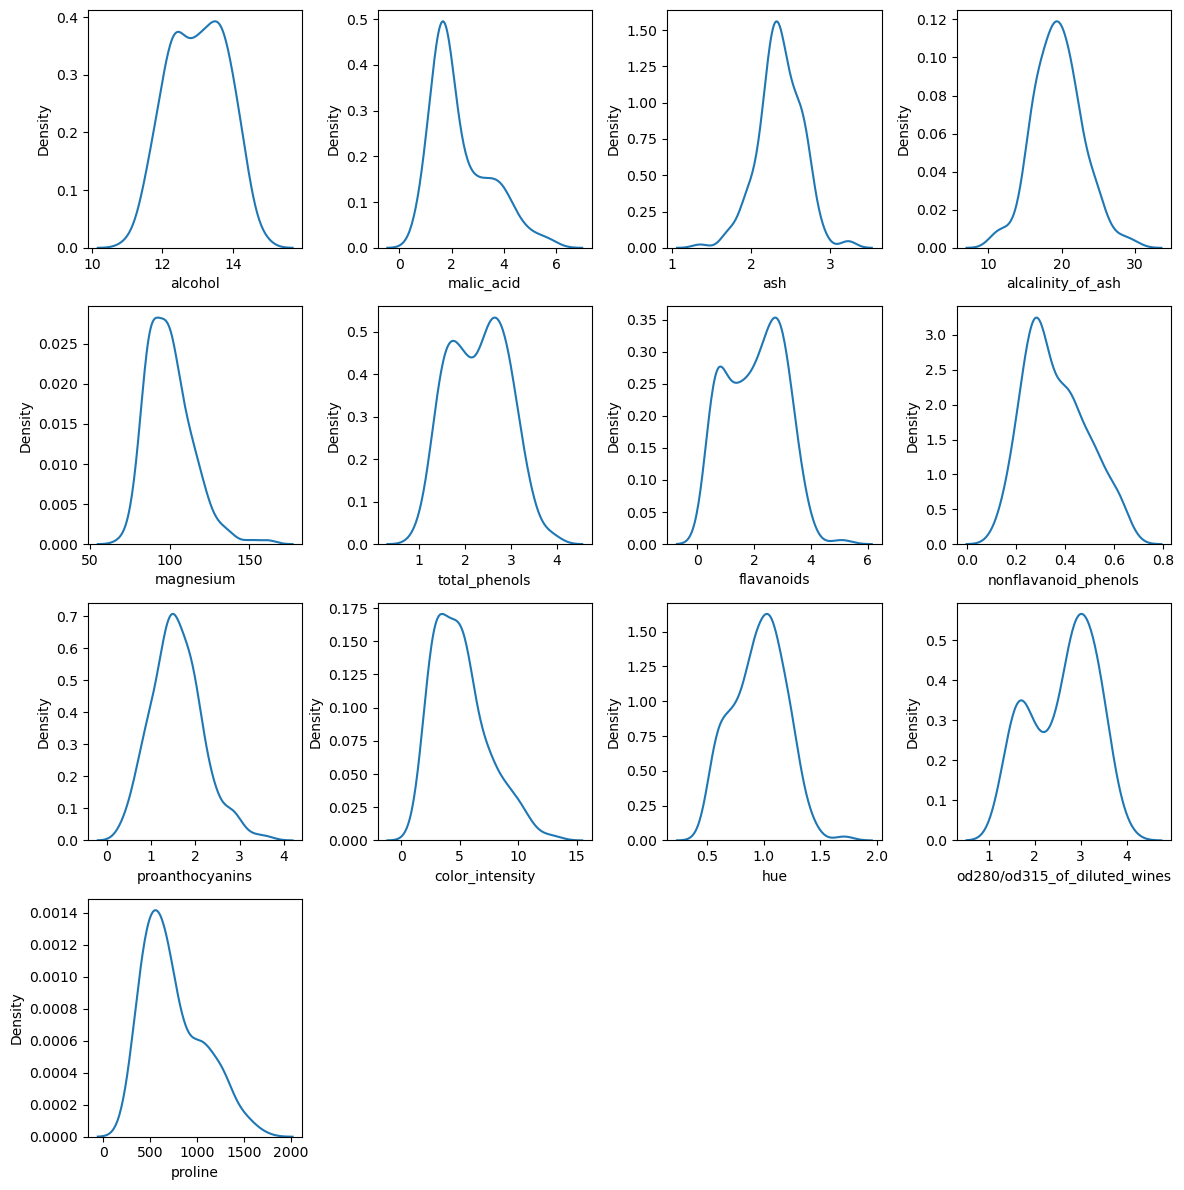

In [93]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_wine.columns) :
    ax = fig.add_subplot(4,4,i+1)
    sns.kdeplot(data=df_wine, x=col)
plt.tight_layout()
plt.show()   

In [95]:
# data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() # StandardScaler() 
scaler.fit(df_wine)
X = scaler.transform(df_wine)

y = wine_label

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

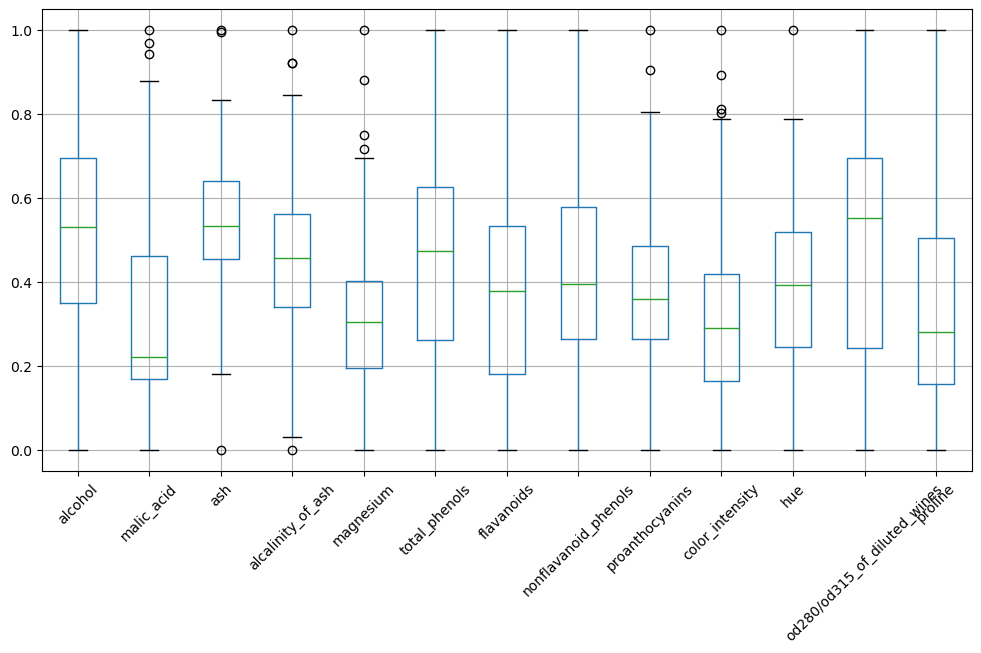

In [96]:
plt.figure(figsize=(12,6))
boxplot = pd.DataFrame(X, columns=wine_feature_names).boxplot()
plt.xticks(rotation=45)

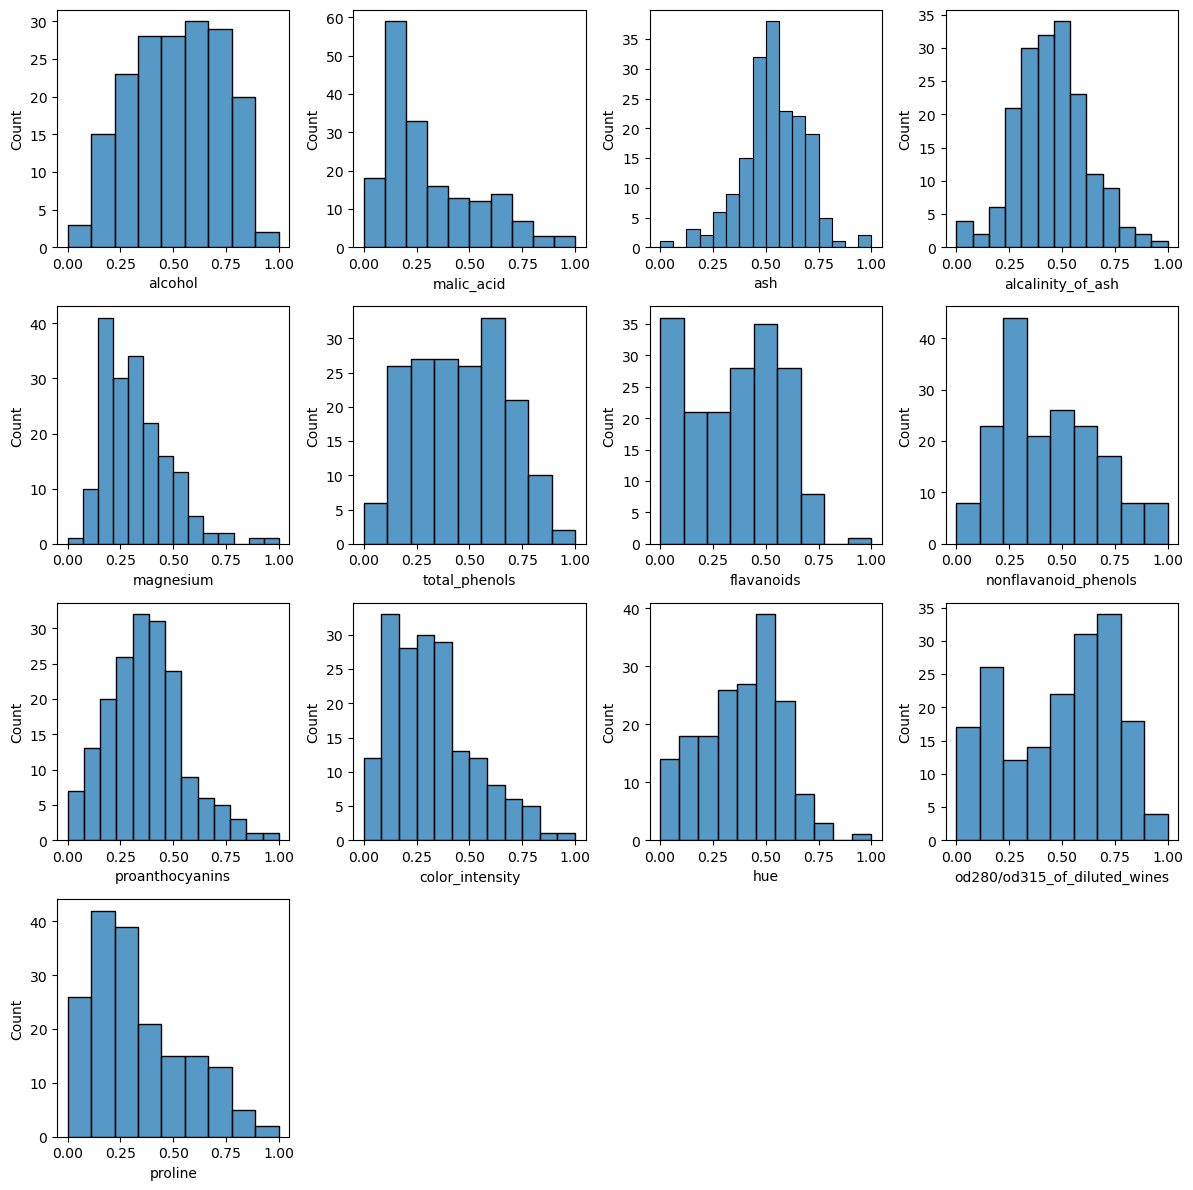

In [98]:
df_X_view = pd.DataFrame(X, columns=wine_feature_names)
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_X_view) :
    ax = fig.add_subplot(4, 4, i+1)
    sns.histplot(data=df_X_view, x=col)
plt.tight_layout()
plt.show() 

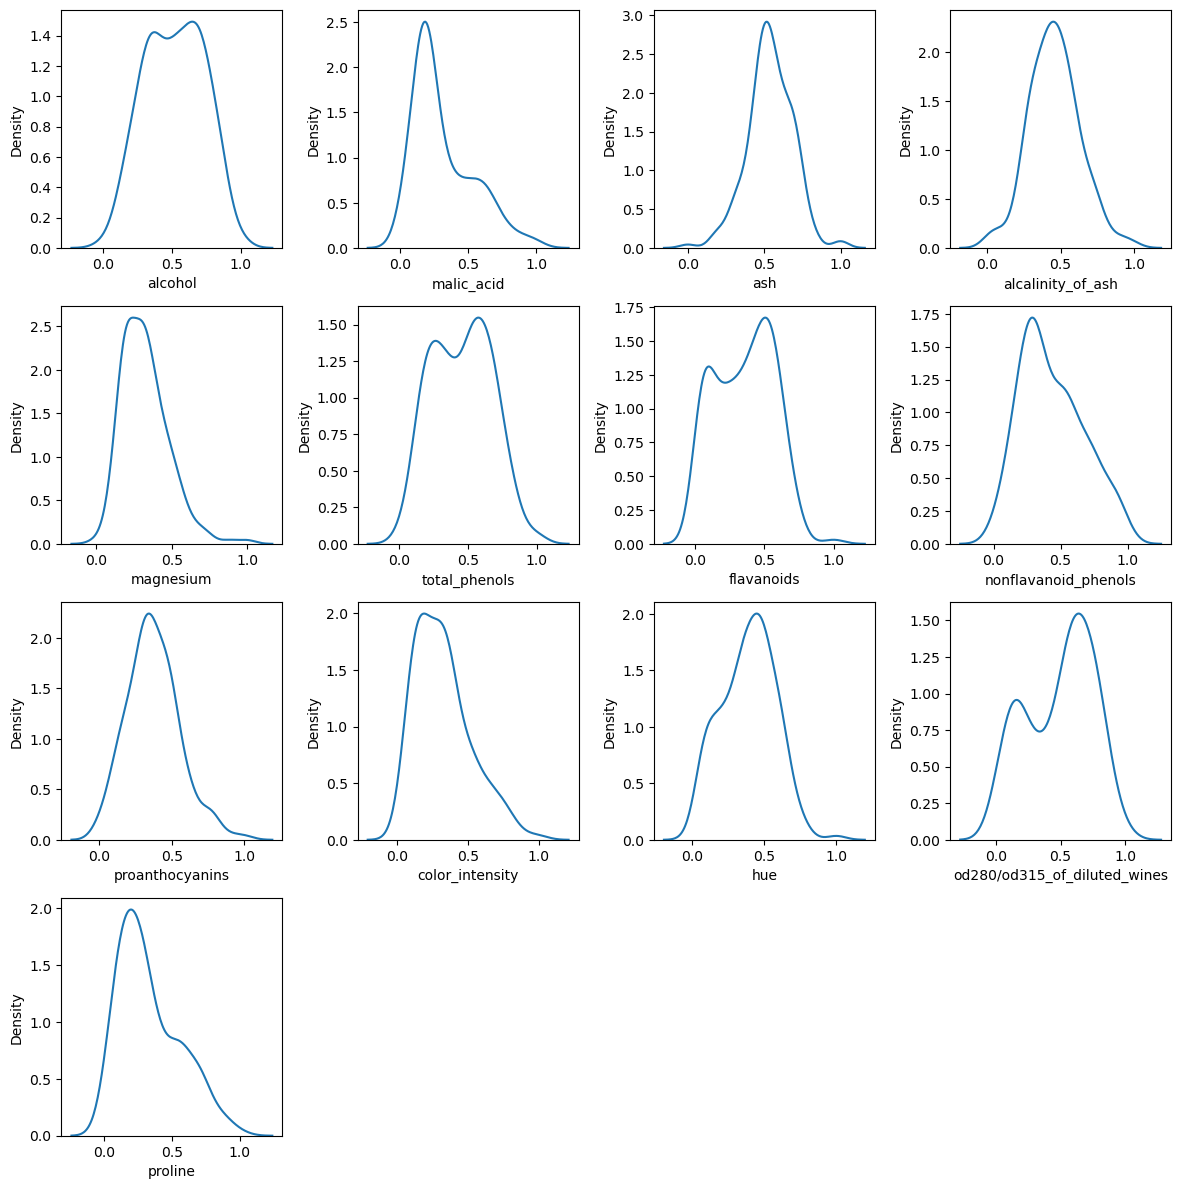

In [99]:
df_X_view = pd.DataFrame(X, columns=wine_feature_names)
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_X_view) :
    ax = fig.add_subplot(4, 4, i+1)
    sns.kdeplot(data=df_X_view, x=col)
plt.tight_layout()
plt.show() 

### (4) train, test 데이타 분리

In [100]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE) 

In [101]:
print('train set')
print('\t X shape', X_train.shape)
print('\t y shape', y_train.shape)
print('test set')
print('\t X shape', X_test.shape)
print('\t y shape', y_test.shape)

train set
	 X shape (142, 13)
	 y shape (142,)
test set
	 X shape (36, 13)
	 y shape (36,)


### (5) 다양한 모델로 학습시켜 보기

### (5-1) Decision Tree

[ Decision Tree ]
estimator type : classifier
Accuracy : 0.9444444444444444
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.944)')

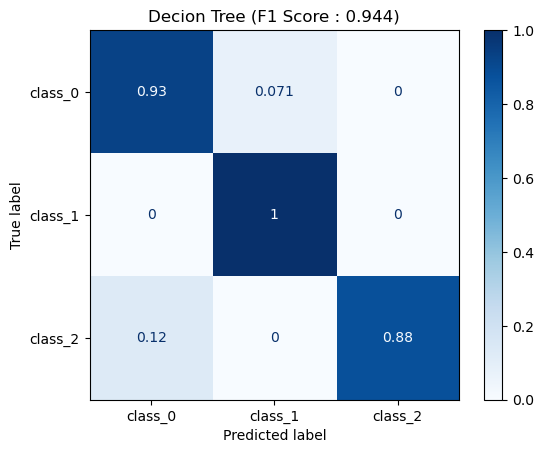

In [103]:
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=wine.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-2) Random Forest

--------------------------------------------------------
[ Random Forest ]
estimator type : classifier
Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Text(0.5, 1.0, 'Random Forest (F1 Score : 1.0)')

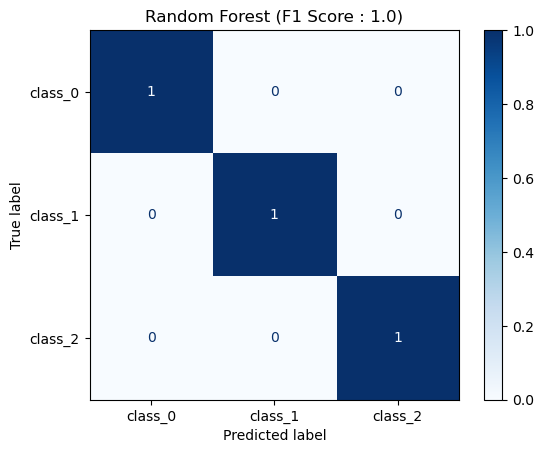

In [104]:
printLine('Random Forest')
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
print('estimator type :', random_forest._estimator_type)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(random_forest, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=wine.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Random Forest (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-3) SVM

--------------------------------------------------------
[ Support Vector Machine ]
estimator type : classifier
Accuracy : 0.8055555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



Text(0.5, 1.0, 'Support Vector Machine (F1 Score : 0.802)')

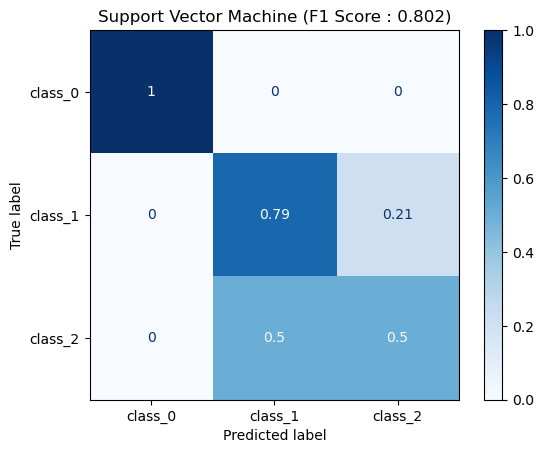

In [105]:
printLine('Support Vector Machine')
svm_model = svm.SVC()
print('estimator type :', svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(svm_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=wine.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Support Vector Machine (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-4) SGD Classifier

--------------------------------------------------------
[ Stochastic Gradient Descent Classifier ]
estimator type : classifier
Accuracy : 0.6111111111111112
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        14
           1       0.86      0.43      0.57        14
           2       0.67      0.25      0.36         8

    accuracy                           0.61        36
   macro avg       0.69      0.56      0.55        36
weighted avg       0.69      0.61      0.58        36



Text(0.5, 1.0, 'Stochastic Gradient Descent (F1 Score :0.575)')

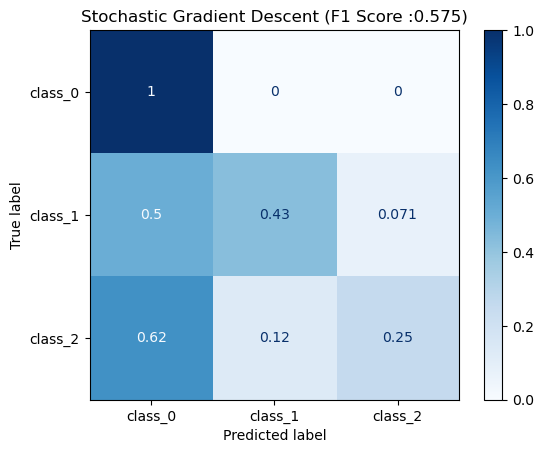

In [106]:
printLine('Stochastic Gradient Descent Classifier')
sgd_model = SGDClassifier() 
print('estimator type :', sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(sgd_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=wine.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Stochastic Gradient Descent (F1 Score :' + str(round(f1score, 3)) + ')')

### (5-5) Logistic Regression

--------------------------------------------------------
[ Logistic Regression Classifier ]
estimator type : classifier
Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

--------------------------------------------------------


Text(0.5, 1.0, 'Logistic Regression (F1 Score :1.0)')

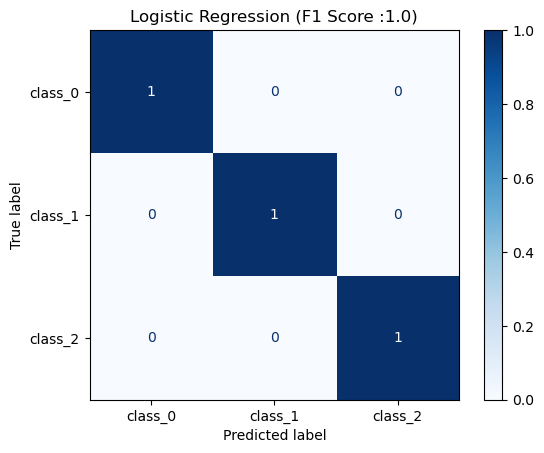

In [107]:
printLine('Logistic Regression Classifier')
logistic_model = LogisticRegression()
print('estimator type :', logistic_model._estimator_type) 
logistic_model.fit(X_test, y_test)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
printLine()
plot = plot_confusion_matrix(logistic_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=wine.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Logistic Regression (F1 Score :' + str(round(f1score, 3)) + ')')

# E-01 3. load_breast_cancer : 유방종양 악성, 양성 분류

### 라이브러리 불러오기

In [111]:
import sklearn 
print('sklean version :',sklearn.__version__)

sklean version : 1.1.2


### 변수 설정

In [112]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

### (1) 필요한 모듈 임포트

In [113]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

### (2) 데이타 준비

In [114]:
breast_cancer = load_breast_cancer()
print('dataset : sklearn.datasets.load_breast_cancer')
print('https:////scikit-learn.org//stable//modules//generated//sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer')

dataset : sklearn.datasets.load_breast_cancer
https:////scikit-learn.org//stable//modules//generated//sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer


### (3) 데이타 이해하기

In [115]:
print('keys :', breast_cancer.keys())
breast_cancer_feature_names = breast_cancer.feature_names
breast_cancer_label = breast_cancer.target
breast_cancer_data = breast_cancer.data
print('target_names :', breast_cancer.target_names)
print(breast_cancer.DESCR)

keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
target_names : ['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the 

In [116]:
df_breast_cancer = pd.DataFrame(breast_cancer_data, columns=breast_cancer_feature_names)

In [117]:
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [120]:
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

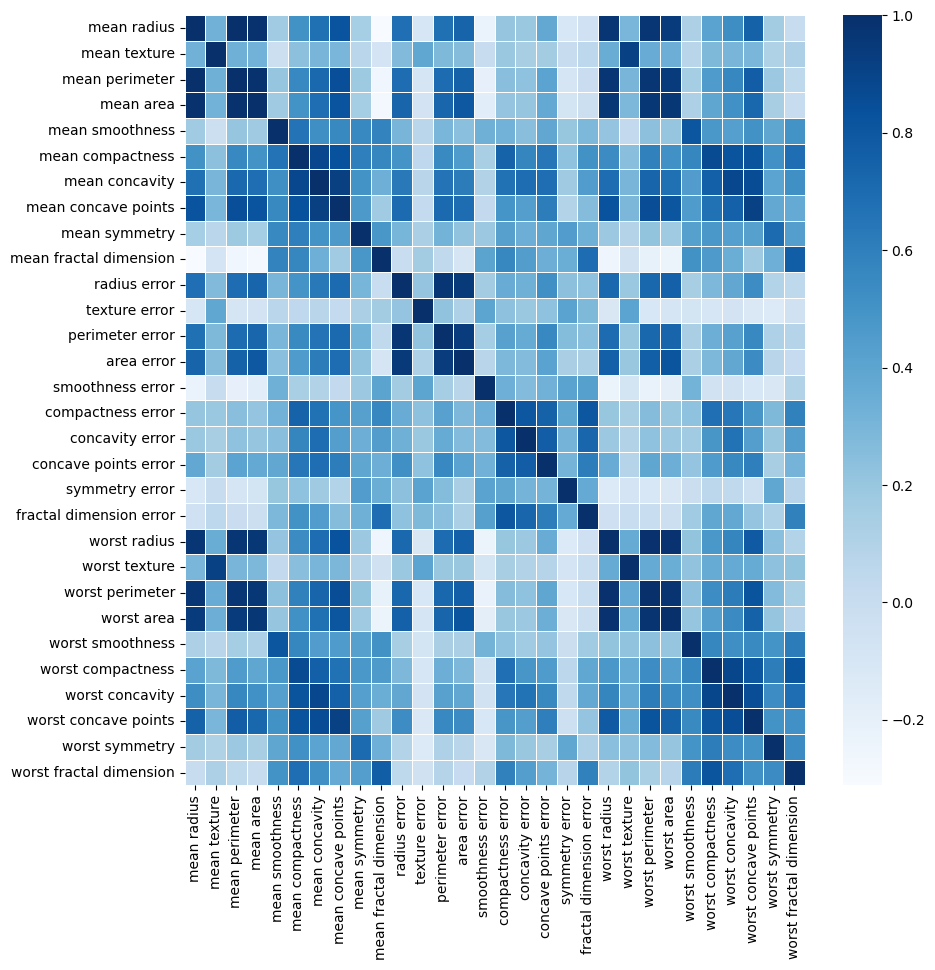

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_breast_cancer.corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactne

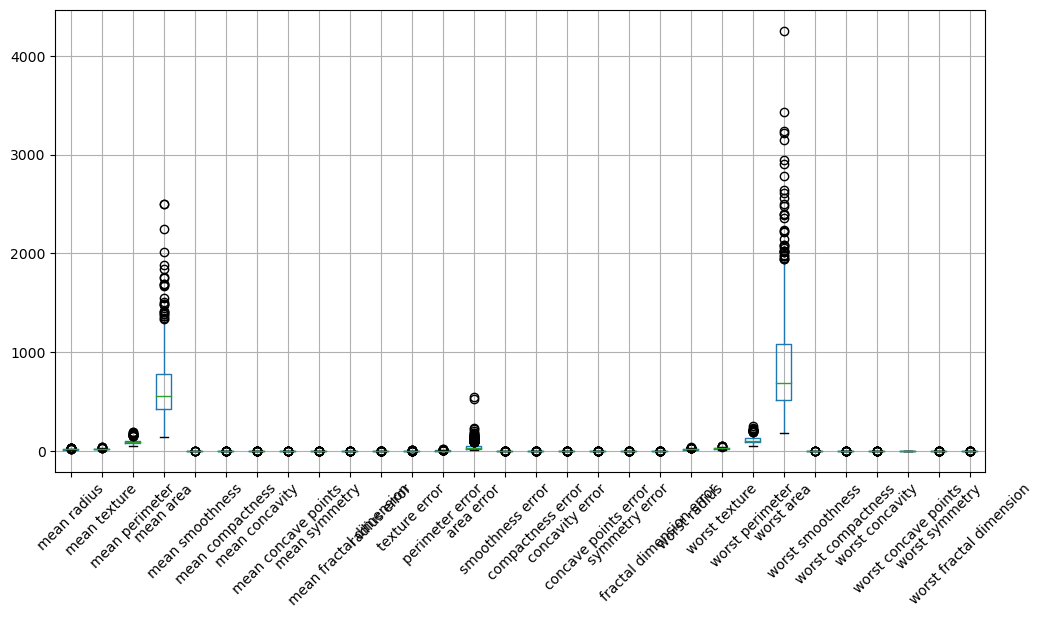

In [124]:
plt.figure(figsize=(12, 6))
boxplot = df_breast_cancer.boxplot()
plt.xticks(rotation=45)

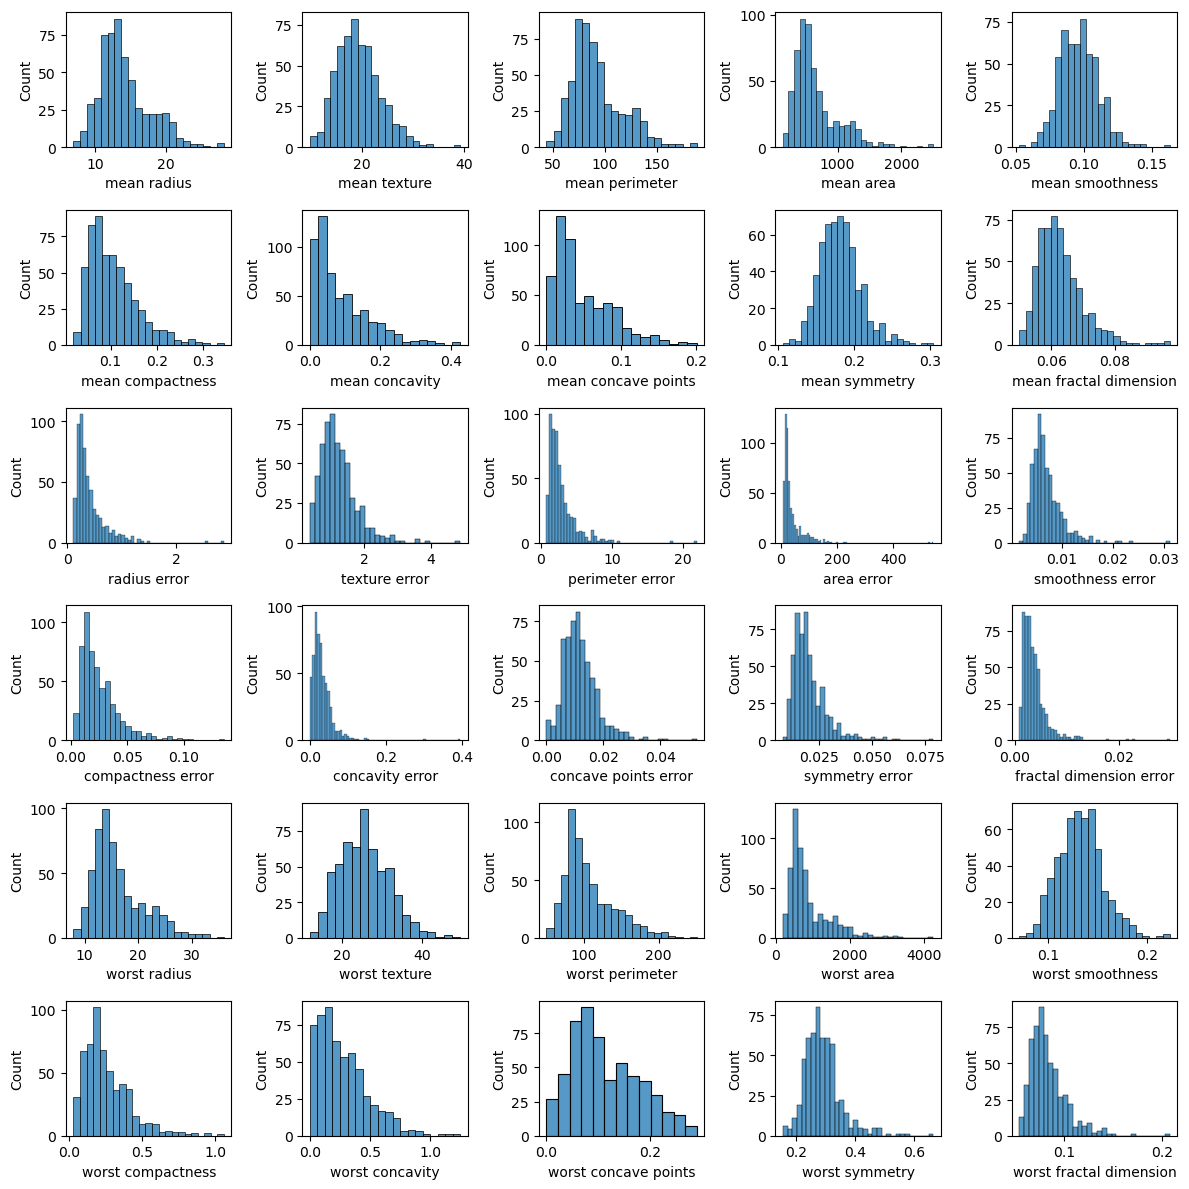

In [127]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_breast_cancer.columns) :
    ax = fig.add_subplot(6,5,i+1)
    sns.histplot(data=df_breast_cancer, x=col)
plt.tight_layout()
plt.show()   

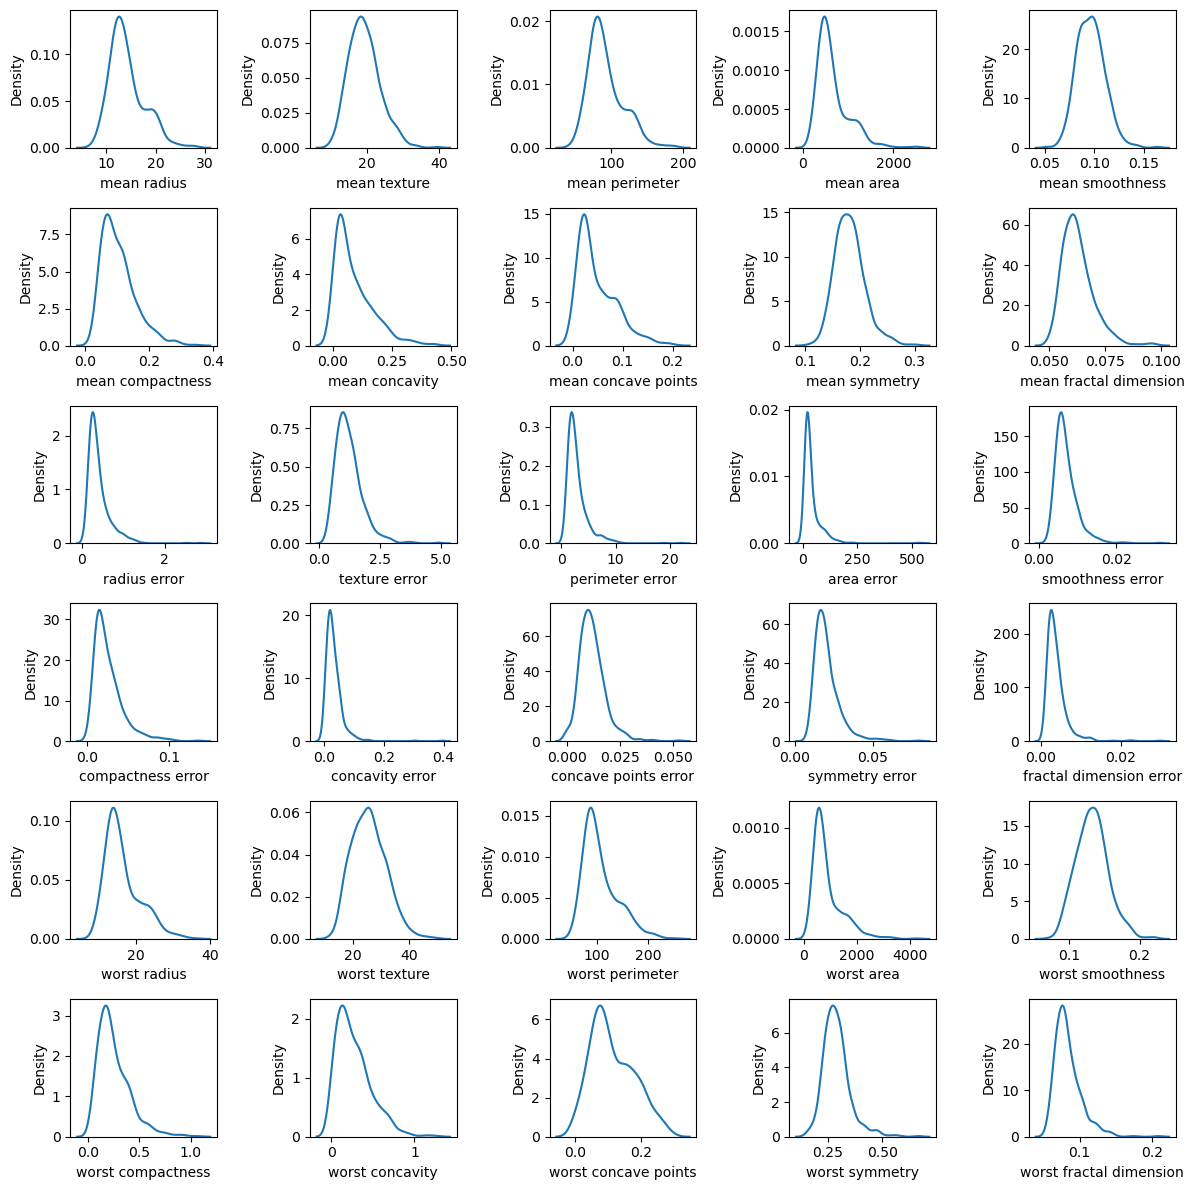

In [128]:
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_breast_cancer.columns) :
    ax = fig.add_subplot(6,5,i+1)
    sns.kdeplot(data=df_breast_cancer, x=col)
plt.tight_layout()
plt.show()   

In [143]:
# data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() # StandardScaler() 
scaler.fit(df_breast_cancer)
X = scaler.transform(df_breast_cancer)

y = breast_cancer_label

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactne

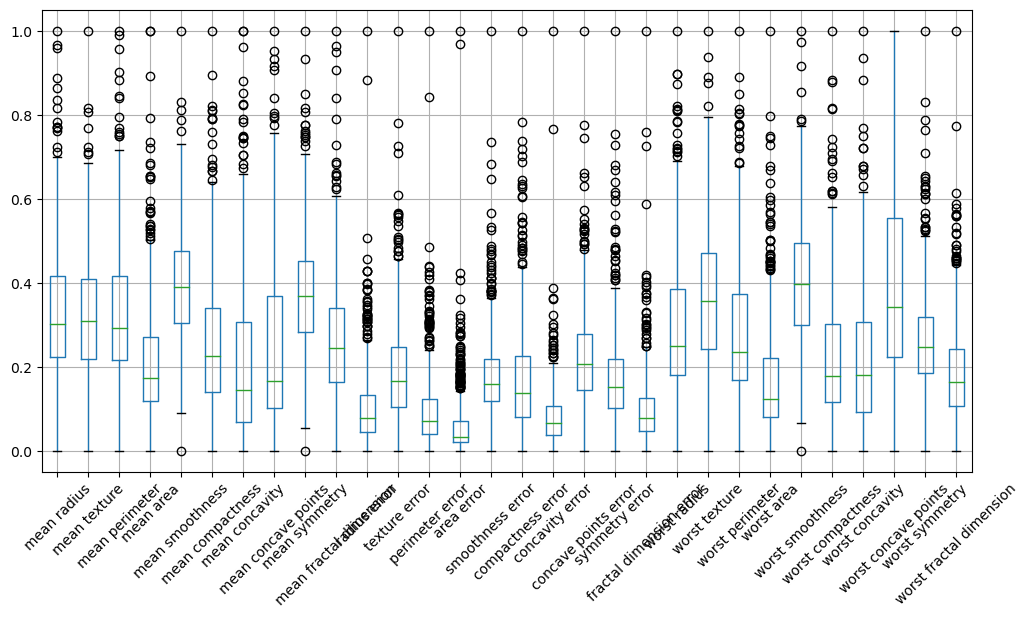

In [144]:
plt.figure(figsize=(12,6))
boxplot = pd.DataFrame(X, columns=breast_cancer_feature_names).boxplot()
plt.xticks(rotation=45)

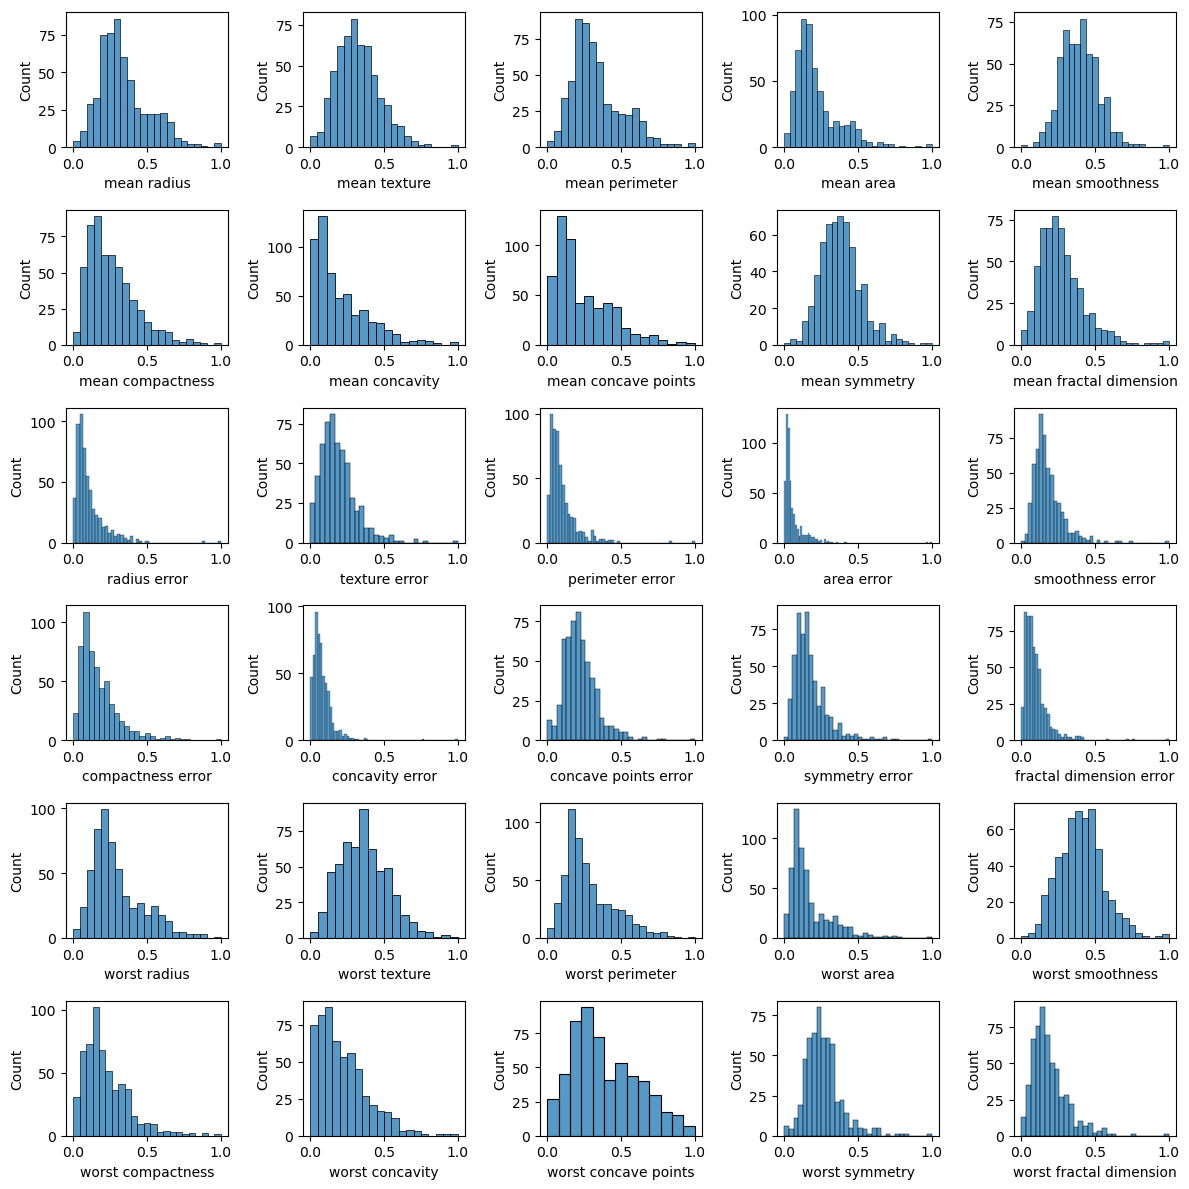

In [146]:
df_X_view = pd.DataFrame(X, columns=breast_cancer_feature_names)
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_X_view) :
    ax = fig.add_subplot(6, 5, i+1)
    sns.histplot(data=df_X_view, x=col)
plt.tight_layout()
plt.show() 

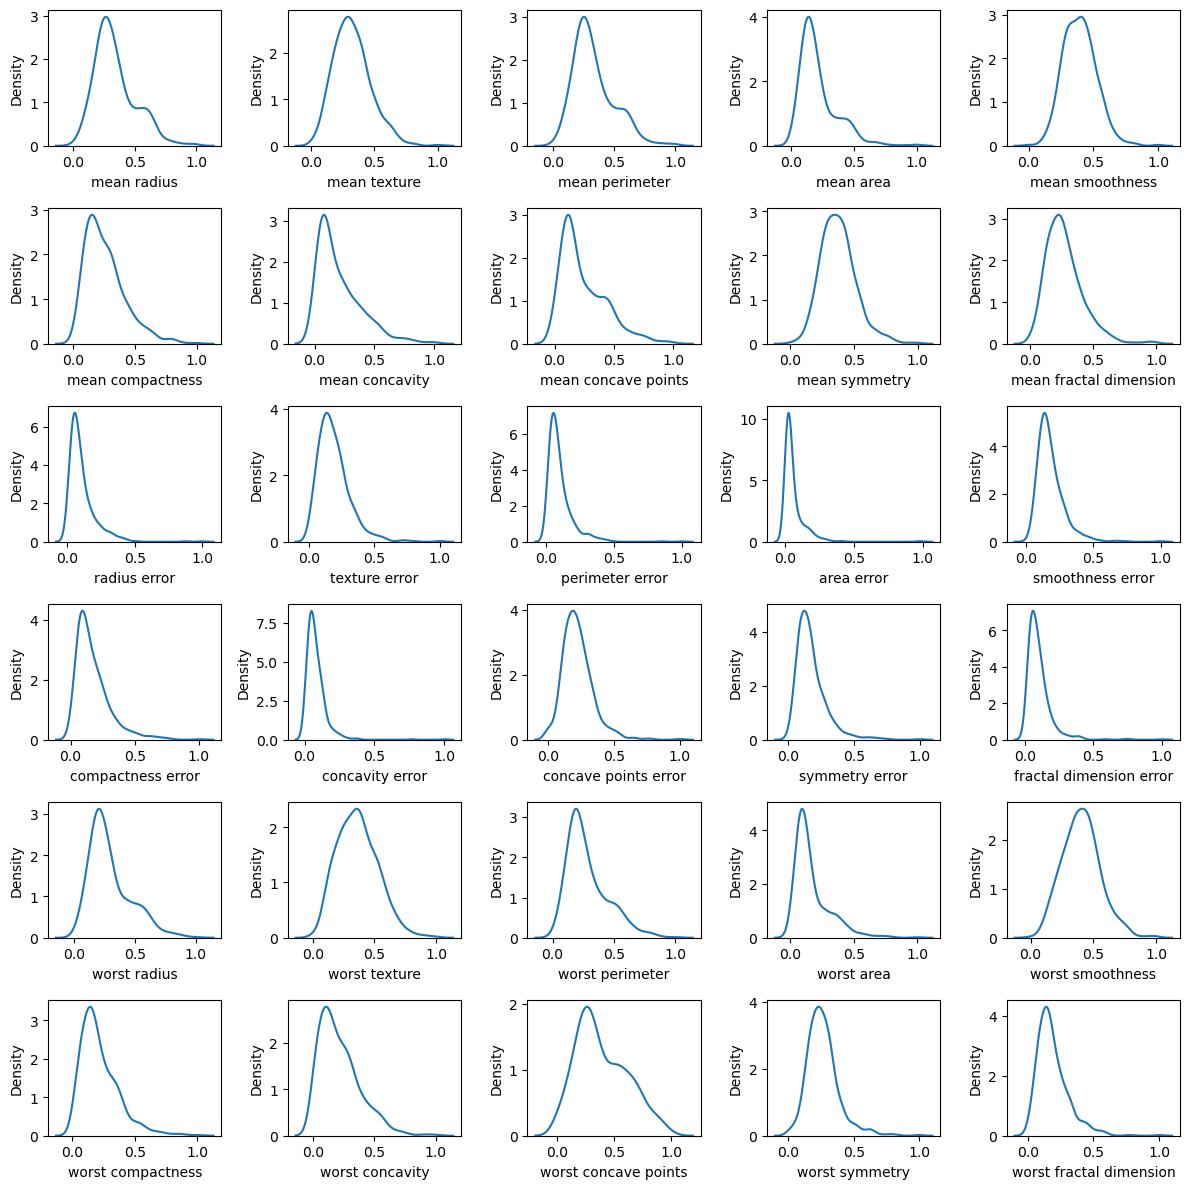

In [134]:
df_X_view = pd.DataFrame(X, columns=breast_cancer_feature_names)
fig = plt.figure(figsize = (12,12))
for i, col in enumerate(df_X_view) :
    ax = fig.add_subplot(6, 5, i+1)
    sns.kdeplot(data=df_X_view, x=col)
plt.tight_layout()
plt.show()

### (4) train, test 데이터 분리

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [150]:
print('train set')
print('\t X shape', X_train.shape)
print('\t y shape', y_train.shape)
print('test set')
print('\t X shape', X_test.shape)
print('\t y shape', y_test.shape)

train set
	 X shape (455, 30)
	 y shape (455,)
test set
	 X shape (114, 30)
	 y shape (114,)


### (5) 다양한 모델로 학습시켜 보기

### (5-1) Decision Tree

[ Decision Tree ]
estimator type : classifier
Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.947)')

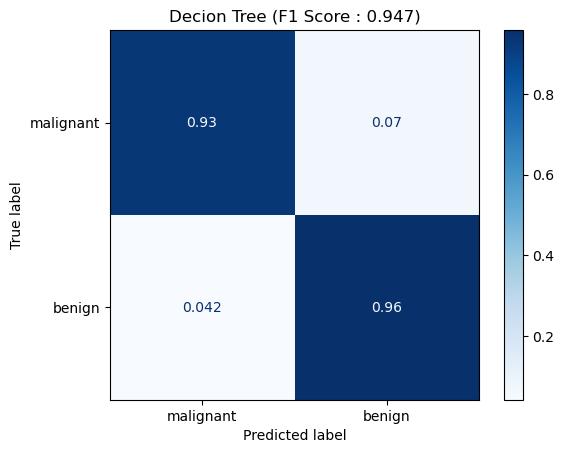

In [151]:
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=breast_cancer.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-2) Random Forest

--------------------------------------------------------
[ Random Forest ]
estimator type : classifier
Accuracy : 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Random Forest (F1 Score : 0.965)')

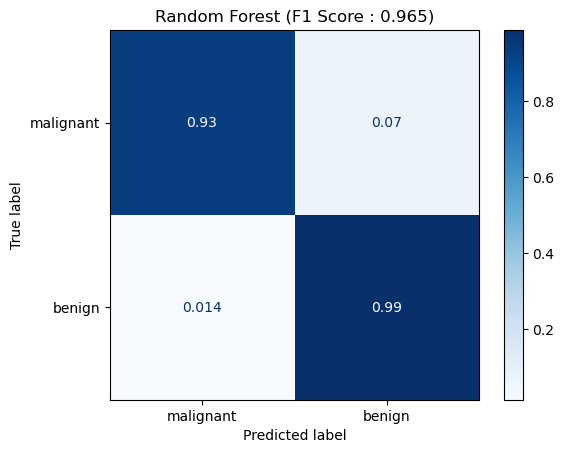

In [152]:
printLine('Random Forest')
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
print('estimator type :', random_forest._estimator_type)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(random_forest, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=breast_cancer.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Random Forest (F1 Score : ' + str(round(f1score, 3)) + ')')

# (5-3) SVM

--------------------------------------------------------
[ Support Vector Machine ]
estimator type : classifier
Accuracy : 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 1.0, 'Support Vector Machine (F1 Score : 0.974)')

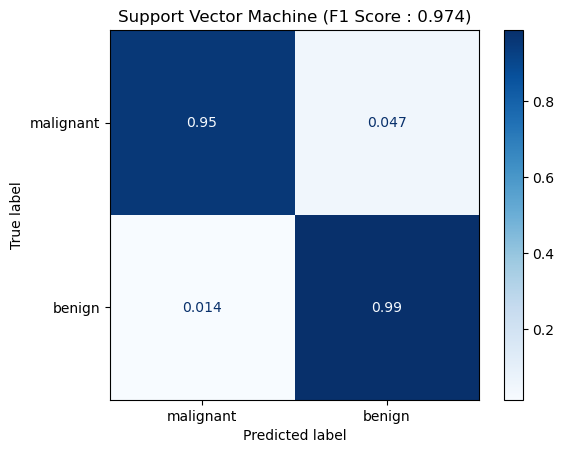

In [153]:
printLine('Support Vector Machine')
svm_model = svm.SVC()
print('estimator type :', svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(svm_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=breast_cancer.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Support Vector Machine (F1 Score : ' + str(round(f1score, 3)) + ')')

### (5-4) SGD Classifier

--------------------------------------------------------
[ Stochastic Gradient Descent Classifier ]
estimator type : classifier
Accuracy : 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 1.0, 'Stochastic Gradient Descent (F1 Score :0.974)')

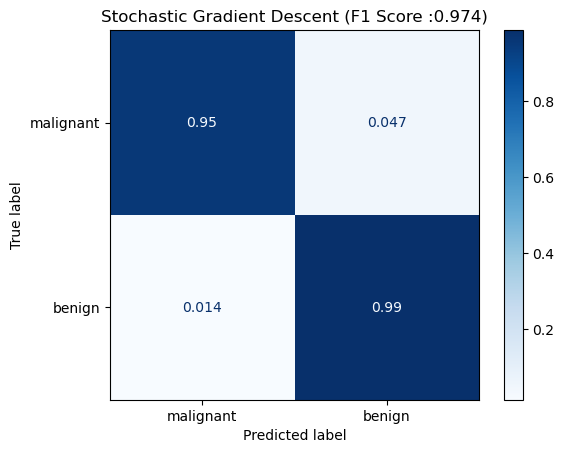

In [154]:
printLine('Stochastic Gradient Descent Classifier')
sgd_model = SGDClassifier() 
print('estimator type :', sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(sgd_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=breast_cancer.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Stochastic Gradient Descent (F1 Score :' + str(round(f1score, 3)) + ')')

### (5-5) Logistic Regression

--------------------------------------------------------
[ Logistic Regression Classifier ]
estimator type : classifier
Accuracy : 0.9649122807017544
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

--------------------------------------------------------


Text(0.5, 1.0, 'Logistic Regression (F1 Score :0.965)')

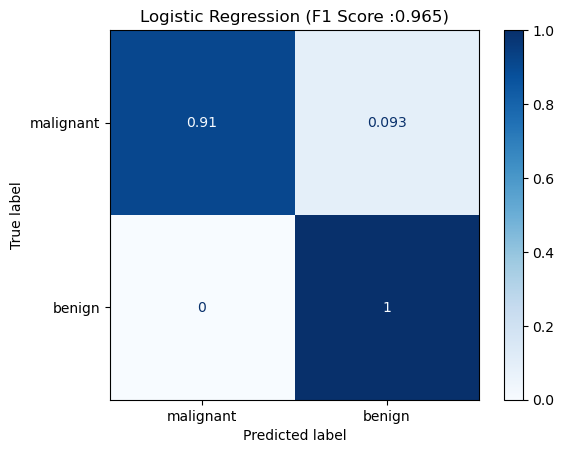

In [155]:
printLine('Logistic Regression Classifier')
logistic_model = LogisticRegression()
print('estimator type :', logistic_model._estimator_type) 
logistic_model.fit(X_test, y_test)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
printLine()
plot = plot_confusion_matrix(logistic_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=breast_cancer.target_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Logistic Regression (F1 Score :' + str(round(f1score, 3)) + ')')

### 루브릭
아래의 기준을 바탕으로 프로젝트를 평가합니다.  

평가문항  
상세기준  

1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?  
feature와 label 선정을 위한 데이터 분석과정을 전개함  

2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?  
모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음  

3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?  
모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음  


# 생각해 본 내용들 정리

### 1. 데이타의 전처리가 트리 기반 모델에서는 큰 효과를 나타내지 못했다. 트리 기반 모델은 쉽게 사용할 수 있지만, 내부 작동 원리에 대한 이해가 부족했다. 이 번 프로젝트를 진행하며 관련된 내용을 찾아보고 엔트로피 기반으로 트리 기반 모델(의사결정트리, 랜덤포레스트, 익스트림 부스팅 등)을 이해할 수 있었다.

### 2. 데이타의 시각화를 통해 전처리 과정 전반을 파악할 수 있었다. 칼럼이 많은 데이타의 경우 이터레이션을 통해 시각화를 수행하는 방법이 효율적인데, pyplot의 subplot을 이용해 효과적으로 처리할 수 있었다. 데이타의 시각화에 히스토그램 기반 그래프를 많이 사용해 왔으나 kdeplot의 사용으로 좀 더 효과적인 시각화가 가능했다.

### 3. 박스 플롯을 통해 아웃라이어를 직관적으로 찾아낼 수 있었다. 시간이 충분하다면 이들을 제외했을 때 성능 향상이 이루어 지는 지 보면 좋을 것 같다.

### 4. 모델의 테스트 결과  : Weighted F1 Score
#### (1) load_digits
##### Decision Tree : 0.842
##### Random Forest : 0.972
##### SVM : 0.981
##### SGD : 0.954
##### Logistic Regression : 1.0


#### (2) load_wine
##### Decision Tree : 0.944
##### Random Forest : 0.802
##### SVM : 1.0
##### SGD : 0.575
##### Logistic Regression : 1.0


#### (3) load_breast_cancer
##### Decision Tree : 0.947
##### Random Forest : 0.965
##### SVM : 0.974
##### SGD : 0.974
##### Logistic Regression : 0.965


### 5. 각 분류 모델의 평가 지표로 weighted F1 Score를 선택하였다. Precision과 recall을 동시에 반영하며, 분류 범주별 샘플 수에 따른 가중치를 부여하는 특성이 평가 지표로 적합해 보였다. 같은 데이타 셋이라도 모델에 따라 성능이 매우 달라짐을 확인할 수 있었다. 다양한 모델을 테스트하여 데이타셋에 가장 맞는 모델을 선택해야 함을 알 수 있었다.

# 참고한 자료들


1. 의사결정나무, Ratsgo 블로그 for textmining  
https://ratsgo.github.io/machine%20learning/2017/03/26/tree/


2. seaborn.histplot  
https://seaborn.pydata.org/generated/seaborn.histplot.html


3. seaborn.kdeplot  
https://seaborn.pydata.org/generated/seaborn.kdeplot.html


4. Confusion Matrix 시각화  
https://jerimo.github.io/python/confusion-matrix/


5. Pandas Dataframe.boxplot  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html


6. Feature importace in Decision Tree  
https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
